In [1]:
import numpy as np
import pandas as pd
from scipy.io.arff import loadarff 
from scipy.stats import kurtosis
from tabulate import tabulate
from IPython.display import display, HTML
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import table
import seaborn as sns

In [2]:
raw_data = loadarff('chronic_kidney_disease.arff')
df_data = pd.DataFrame(raw_data[0])

# Plotting data(columns) distribution

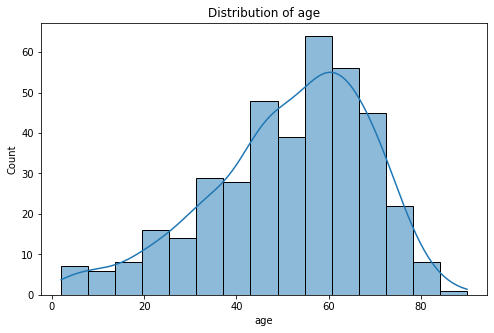

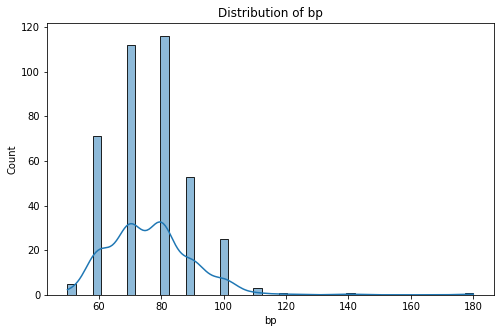

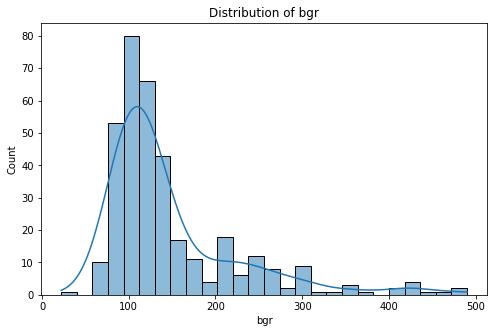

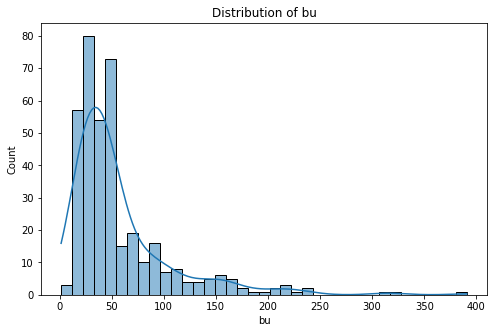

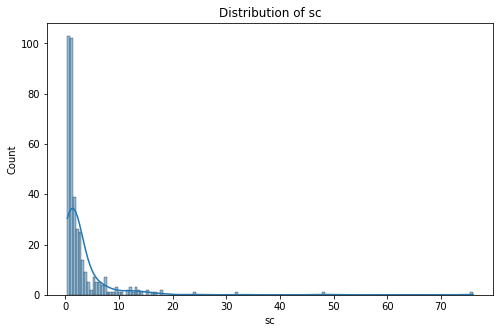

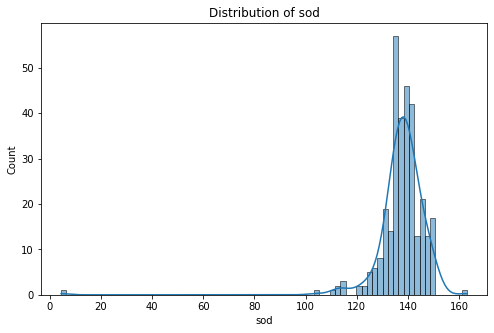

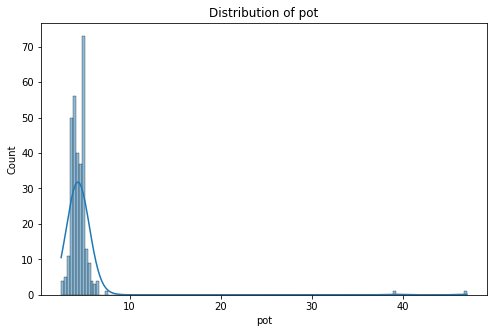

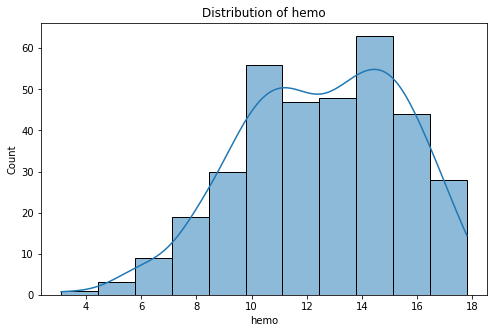

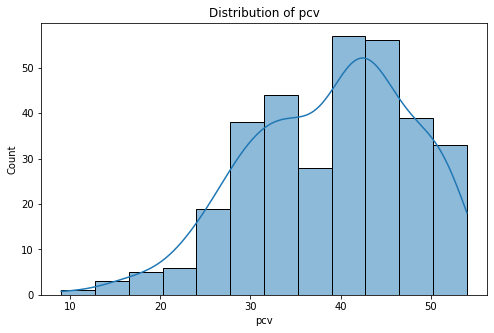

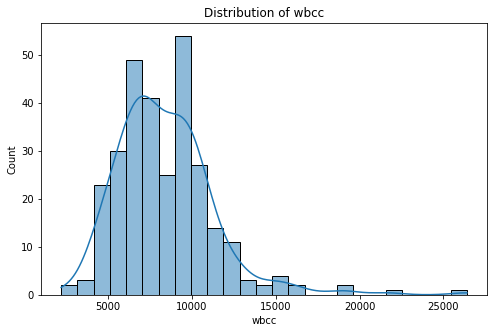

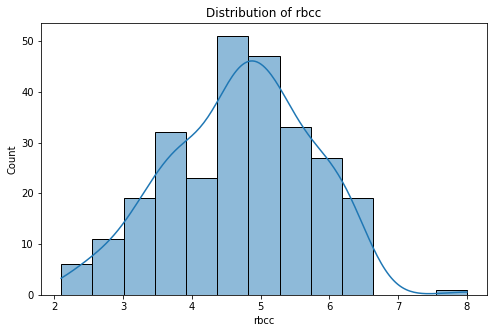

In [3]:
numeric_columns = df_data.select_dtypes(include=['float64', 'int64']).columns
for column in numeric_columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(df_data[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()

# measuring skewness

In [5]:
numeric_columns = df_data.select_dtypes(include=['float64', 'int64']).columns
skewness = df_data[numeric_columns].skew()
print("Skewness:")
print(skewness)


Skewness:
age     -0.668259
bp       1.605429
bgr      2.010773
bu       2.634374
sc       7.509538
sod     -6.996569
pot     11.582956
hemo    -0.335095
pcv     -0.433679
wbcc     1.621589
rbcc    -0.183329
dtype: float64


# statistical details before removing outliers

In [6]:
# Calculate mean, median, mode, and standard deviation
statistics_df = df_data.describe().transpose()[['mean', '50%', 'std']]

# Calculate mode separately, as it returns multiple modes as a Series
mode_df = df_data.mode().transpose().rename(columns={0: 'mode'})

# Concatenate mode_df with the main statistics_df
statistics_df = pd.concat([statistics_df, mode_df], axis=1)

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
q1 = df_data.quantile(0.25)
q3 = df_data.quantile(0.75)

# Calculate kurtosis
kurtosis_values = df_data.kurtosis()

# Add Q1, Q3, and kurtosis to the statistics_df
statistics_df['Q1'] = q1
statistics_df['Q3'] = q3
statistics_df['kurtosis'] = kurtosis_values

# Display the tabular form of statistical details
print(statistics_df)

              mean      50%          std           mode     1      Q1      Q3  \
age      51.483376    55.00    17.169714           60.0   NaN    42.0    64.5   
bp       76.469072    80.00    13.683637           80.0   NaN    70.0    80.0   
bgr     148.036517   121.00    79.281714           99.0   NaN    99.0   163.0   
bu       57.425722    42.00    50.503006           46.0   NaN    27.0    66.0   
sc        3.072454     1.30     5.741126            1.2   NaN     0.9     2.8   
sod     137.528754   138.00    10.408752          135.0   NaN   135.0   142.0   
pot       4.627244     4.40     3.193904            3.5   5.0     3.8     4.9   
hemo     12.526437    12.65     2.912587           15.0   NaN    10.3    15.0   
pcv      38.884498    40.00     8.990105           41.0  52.0    32.0    45.0   
wbcc   8406.122449  8000.00  2944.474190         9800.0   NaN  6500.0  9800.0   
rbcc      4.707435     4.80     1.025323            5.2   NaN     3.9     5.4   
sg             NaN      NaN 

# removing outlier

In [8]:
Q1 = df_data[numeric_columns].quantile(0.25)
Q3 = df_data[numeric_columns].quantile(0.75)
IQR = Q3 - Q1

df_no_outliers = df_data[~((df_data[numeric_columns] < (Q1 - 1.5 * IQR)) | (df_data[numeric_columns] > 
                                                                            (Q3 + 1.5 * IQR))).any(axis=1)]

df_data = df_no_outliers

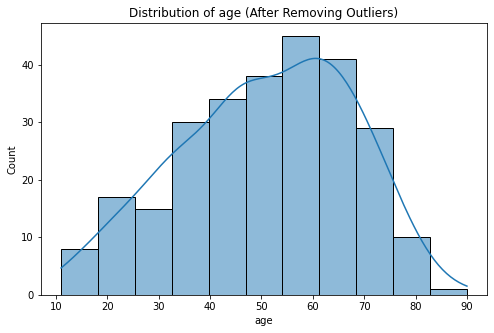

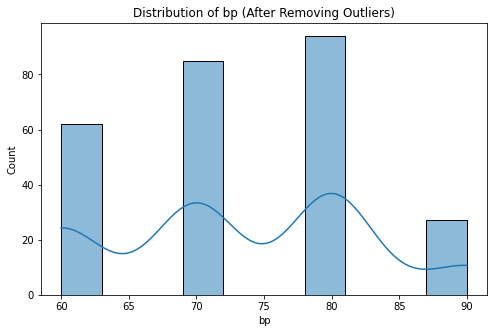

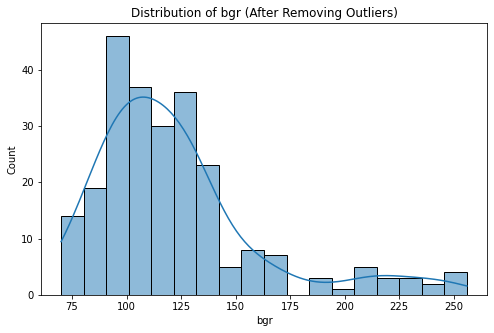

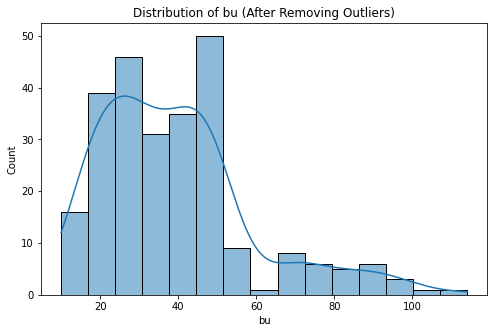

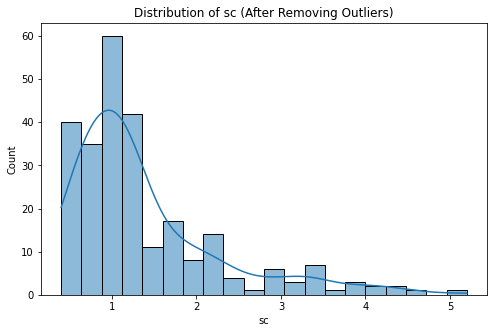

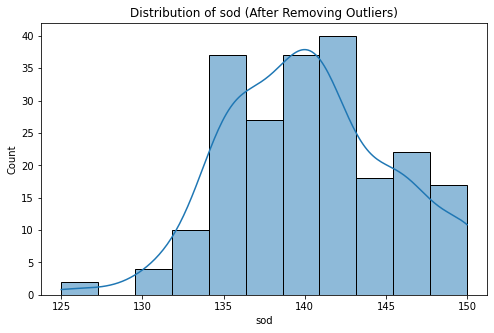

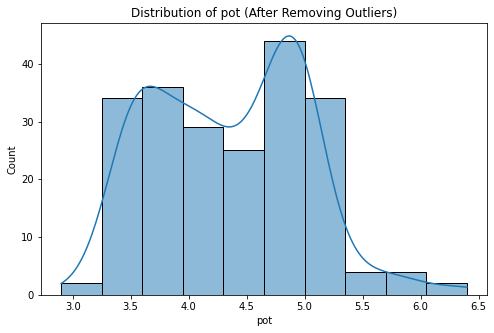

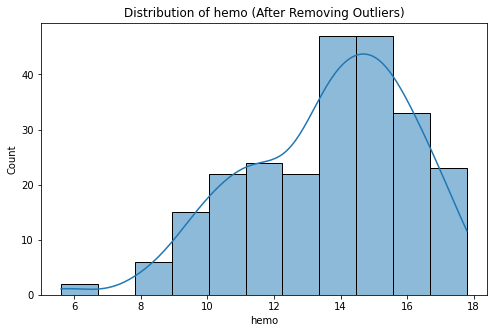

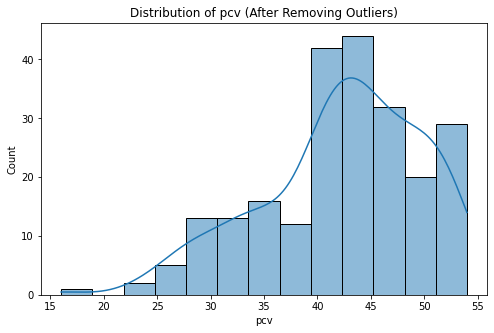

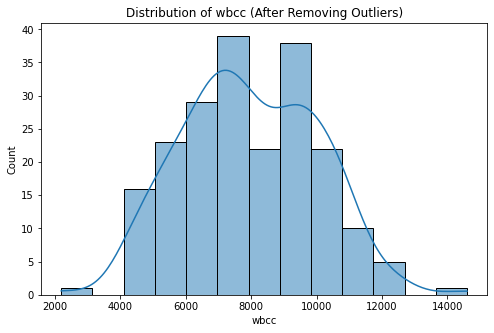

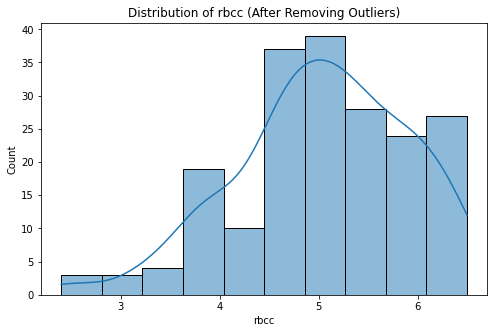

In [10]:
numeric_columns = df_data.select_dtypes(include=['float64', 'int64']).columns
for column in numeric_columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(df_no_outliers[column], kde=True)
    plt.title(f'Distribution of {column} (After Removing Outliers)')
    plt.show()


# loading dependent and independent variables

In [12]:
dependent_variable = df_data['class']
independent_variables = df_data.drop('class', axis=1)

# statistical detail after removing outlier

In [13]:
# Calculate mean, median, mode, and standard deviation
statistics_df = df_data.describe().transpose()[['mean', '50%', 'std']]

# Calculate mode separately, as it returns multiple modes as a Series
mode_df = df_data.mode().transpose().rename(columns={0: 'mode'})

# Concatenate mode_df with the main statistics_df
statistics_df = pd.concat([statistics_df, mode_df], axis=1)

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
q1 = df_data.quantile(0.25)
q3 = df_data.quantile(0.75)

# Calculate kurtosis
kurtosis_values = df_data.kurtosis()

# Add Q1, Q3, and kurtosis to the statistics_df
statistics_df['Q1'] = q1
statistics_df['Q3'] = q3
statistics_df['kurtosis'] = kurtosis_values

# Display the tabular form of statistical details
print(statistics_df)

              mean      50%          std           mode       Q1      Q3  \
age      50.787313    52.00    16.714935           60.0    39.00    64.0   
bp       73.208955    70.00     9.409593           80.0    70.00    80.0   
bgr     122.121951   114.00    37.882651           99.0    98.25   132.0   
bu       39.267315    37.00    19.709116           46.0    25.00    48.0   
sc        1.373062     1.10     0.891454            1.2     0.80     1.6   
sod     140.294393   140.00     5.055770          135.0   137.00   144.0   
pot       4.349533     4.35     0.656978            5.0     3.80     4.9   
hemo     13.649378    14.00     2.443957           15.0    11.90    15.4   
pcv      42.314410    43.00     7.486644           52.0    39.00    48.0   
wbcc   7969.902913  7800.00  2054.612180        11000.0  6525.00  9500.0   
rbcc      5.039691     5.10     0.862652            5.2     4.50     5.7   
sg             NaN      NaN          NaN       b'1.020'      NaN     NaN   
al          